In [23]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt


In [24]:
GPU_timings =  pd.read_csv('Scaling_time.csv', header=0, sep=',', names=['Nodes','SSOR','Richardson','CG','Gauss-Seidel'], usecols=['Nodes','SSOR','Richardson','CG','Gauss-Seidel'], dtype=np.float64)

Iterations =  pd.read_csv('Iterations.csv', header=0, sep=',', names=['Gauss-Seidel','CG','Richardson','SSOR'], usecols=['Gauss-Seidel','CG','Richardson','SSOR'], dtype=np.float64)

Preconditioner_time =  pd.read_csv('Preconditioner_time.csv', header=0, sep=',', names=['Nodes','Gauss-Seidel','Richardson','SSOR'], usecols=['Nodes','Gauss-Seidel','Richardson','SSOR'], dtype=np.float64)


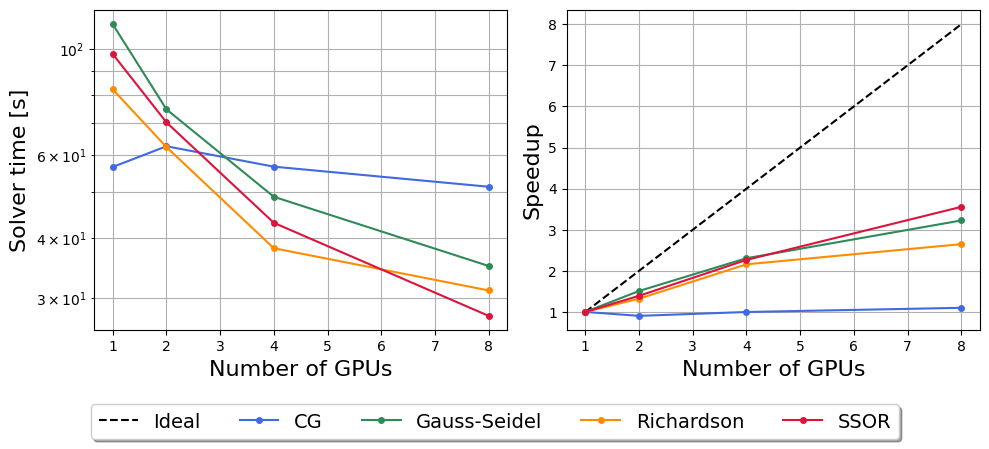

In [25]:
fig, axes = plt.subplots(1, 2,figsize=(10, 4))

colors = ['royalblue', 'seagreen', 'darkorange','crimson']

for c, preconditioner in enumerate(['CG','Gauss-Seidel','Richardson','SSOR']):
    axes[0].plot(np.array(GPU_timings.get('Nodes')), np.array(GPU_timings.get(preconditioner)), marker="o",markersize=4,color=colors[c], label=preconditioner)


##plt.title("GPU Strong Scaling of LandauDamping (256³,134217728, 0.05)", fontsize=16)
axes[0].set_yscale('log')
axes[0].set_ylabel("Solver time [s]", fontsize=16)
#plt.xlim(1,9)
#plt.ylim(10, 1000)
axes[0].set_xlabel('Number of GPUs', fontsize=16)
#plt.xticks(np.arange(1,129,step=1))
axes[0].grid('True', which='both')


axes[1].plot(np.array(GPU_timings.get('Nodes')), np.array(GPU_timings.get('Nodes')), color='black', linestyle='--',  label="Ideal")
for c,preconditioner in enumerate(['CG','Gauss-Seidel','Richardson','SSOR']):
    axes[1].plot(np.array(GPU_timings.get('Nodes')), np.array(GPU_timings.get(preconditioner))[0]/np.array(GPU_timings.get(preconditioner)),color=colors[c], marker="o",markersize=4,  label=preconditioner)


#plt.title("GPU Speedup of LandauDamping (256³,134217728, 0.05)", fontsize=16)
#plt.yscale('log')
axes[1].set_ylabel("Speedup", fontsize=16)
#plt.xlim(1,9)
#plt.ylim(10, 1000)
#plt.xticks(np.arange(1,5,step=1))
axes[1].set_xlabel('Number of GPUs', fontsize=16)
axes[1].grid('True', which='both')

handles, labels = axes[1].get_legend_handles_labels()


fig.legend(
    handles,
    labels,
    loc='upper center',
    bbox_to_anchor=(0.5, 0.0),  
    fancybox=True,
    shadow=True,
    ncol=5,
    prop={'size': 14}
)


plt.tight_layout(rect=[0, 0, 1, 1])

plt.savefig('LandauDamping_GPU.pdf',bbox_inches="tight",dpi=600)   
plt.show()


[82.3034 49.7709 24.7603 12.499 ]
[82.3034 49.7709 24.7603 12.499 ]


/tmp/ipykernel_103701/4255031306.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  SSOR = np.divide(SSOR1,float(Iterations.get('SSOR')))
/tmp/ipykernel_103701/4255031306.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  GS = np.divide(GS1,float(Iterations.get('Gauss-Seidel')))
/tmp/ipykernel_103701/4255031306.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Richardson = np.divide(Richardson1,float(Iterations.get('Richardson')))


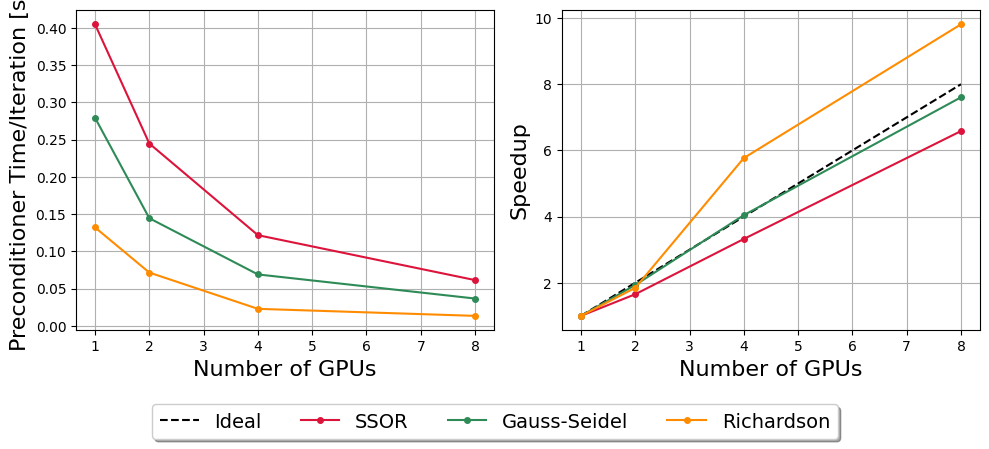

In [26]:
fig, axes = plt.subplots(1, 2,figsize=(10, 4))

SSOR1 = np.array(Preconditioner_time.get('SSOR'))
GS1 = np.array(Preconditioner_time.get('Gauss-Seidel'))
Richardson1 = np.array(Preconditioner_time.get('Richardson'))

print(SSOR1)


SSOR = np.divide(SSOR1,float(Iterations.get('SSOR')))
GS = np.divide(GS1,float(Iterations.get('Gauss-Seidel')))
Richardson = np.divide(Richardson1,float(Iterations.get('Richardson')))

axes[0].plot(np.array(Preconditioner_time.get('Nodes')), SSOR, marker="o",markersize=4,color=colors[3], label='SSOR')
axes[0].plot(np.array(Preconditioner_time.get('Nodes')), GS, marker="o",markersize=4,color=colors[1], label='Gauss-Seidel')
axes[0].plot(np.array(Preconditioner_time.get('Nodes')), Richardson, marker="o",markersize=4,color=colors[2], label='Richardson')


##plt.title("GPU Strong Scaling of LandauDamping (256³,134217728, 0.05)", fontsize=16)
#plt.yscale('log')
axes[0].set_ylabel("Preconditioner Time/Iteration [s]", fontsize=16)
#plt.xlim(1,9)
#plt.ylim(10, 1000)
axes[0].set_xlabel('Number of GPUs', fontsize=16)
#plt.xticks(np.arange(1,129,step=1))
axes[0].grid('True', which='both')

SSOR = np.array(Preconditioner_time.get('SSOR'))
GS = np.array(Preconditioner_time.get('Gauss-Seidel'))
Richardson = np.array(Preconditioner_time.get('Richardson'))

print(SSOR)


axes[1].plot(np.array(Preconditioner_time.get('Nodes')), np.array(Preconditioner_time.get('Nodes')), color='black', linestyle='--',  label="Ideal")
axes[1].plot(np.array(Preconditioner_time.get('Nodes')), np.array(SSOR[0]/SSOR), marker="o",markersize=4,color=colors[3], label='SSOR')
axes[1].plot(np.array(Preconditioner_time.get('Nodes')), np.array(GS[0]/GS), marker="o",markersize=4,color=colors[1], label='Gauss-Seidel')
axes[1].plot(np.array(Preconditioner_time.get('Nodes')), np.array(Richardson[0]/Richardson), marker="o",markersize=4,color=colors[2], label='Richardson')


##plt.title("GPU Strong Scaling of LandauDamping (256³,134217728, 0.05)", fontsize=16)
#plt.yscale('log')
axes[1].set_ylabel("Speedup", fontsize=16)
#plt.xlim(1,9)
#plt.ylim(10, 1000)
axes[1].set_xlabel('Number of GPUs', fontsize=16)
#plt.xticks(np.arange(1,129,step=1))
axes[1].grid('True', which='both')


handles, labels = axes[1].get_legend_handles_labels()


fig.legend(
    handles,
    labels,
    loc='upper center',
    bbox_to_anchor=(0.5, 0.0),  
    fancybox=True,
    shadow=True,
    ncol=5,
    prop={'size': 14}
)


plt.tight_layout(rect=[0, 0, 1, 1])

plt.savefig('Preconditioner_GPU.pdf',bbox_inches="tight",dpi=600)   
plt.show()